In [3]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler



In [4]:
np_df = pd.read_csv("data/national_park_species.csv")

np_df.head(3)

,ParkCode,ParkName,CategoryName,Order,Family,TaxonRecordStatus,SciName,CommonNames,ParkAccepted,Sensitive,...,ParkTags,References,Observations,Vouchers,ExternalLinks,TEStatus,StateStatus,OzoneSensitiveStatus,GRank,SRank
0,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Alces alces,Moose,True,False,...,NaN,11,1,0,NaN,50,NaN,NaN,G5,ME: S5
1,ACAD,Acadia National Park,Mammal,Artiodactyla,Cervidae,Active,Odocoileus virginianus,"Northern White-tailed Deer, Virginia Deer, Whi...",True,False,...,NaN,20,0,0,NaN,50,NaN,NaN,G5,ME: S5
2,ACAD,Acadia National Park,Mammal,Carnivora,Canidae,Active,Canis latrans,"Coyote, Eastern Coyote",True,False,...,NaN,8,1,0,NaN,SC,NaN,NaN,G5,ME: S5


In [5]:
# Data pre processing

# Encode categorical variables:

for col in ['CategoryName', 'Order', 'Family', 'GRank', 'ParkName', 'Sensitive', 'Nativeness', 'Observations']:
    np_df[f"{col}_cat"] = np_df[col].astype('category').cat.codes


In [6]:
np_df.columns

Index(['ParkCode', 'ParkName', 'CategoryName', 'Order', 'Family',
       'TaxonRecordStatus', 'SciName', 'CommonNames', 'ParkAccepted',
       'Sensitive', 'RecordStatus', 'Occurrence', 'OccurrenceTags',
       'Nativeness', 'NativenessTags', 'Abundance', 'NPSTags', 'ParkTags',
       'References', 'Observations', 'Vouchers', 'ExternalLinks', 'TEStatus',
       'StateStatus', 'OzoneSensitiveStatus', 'GRank', 'SRank',
       'CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'ParkName_cat', 'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')

In [12]:
# Split data into X and y
X = np_df[['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
        'Sensitive_cat', 'Nativeness_cat', 'Observations_cat']]

y = np_df['ParkName_cat']

In [13]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [14]:
# Standardize the predictors
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
# KNN model

# Initialize KNN classifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [16]:
# Calculate accuracy_score 

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5521378708551483


In [20]:
# Visualize KNN results 

# Function that interates over different values of K
def knn():

    k_values = [3, 5, 7, 9, 11]
    accuracies = []

    
    # Loop through the different k values and fit a model/obtain accuracy
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)

        # Make predictions and calculate accuracy
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        print(f"K = {k} - Accuracy: {accuracy:.3f}")

# Visualize the effect of K on accuracy

    plt.figure(figsize = (10, 6))
    plt.plot(k_values, accuracies, marker = 'o')
    plt.xlabel('Numer of Neighbors (K)')
    plt.ylabel('Accuracy')
    plt.title('KNN: Effect of K on Model Accuracy')
    plt.grid(True)
    plt.show()




K = 3 - Accuracy: 0.549
K = 5 - Accuracy: 0.552
K = 7 - Accuracy: 0.554
K = 9 - Accuracy: 0.557
K = 11 - Accuracy: 0.556


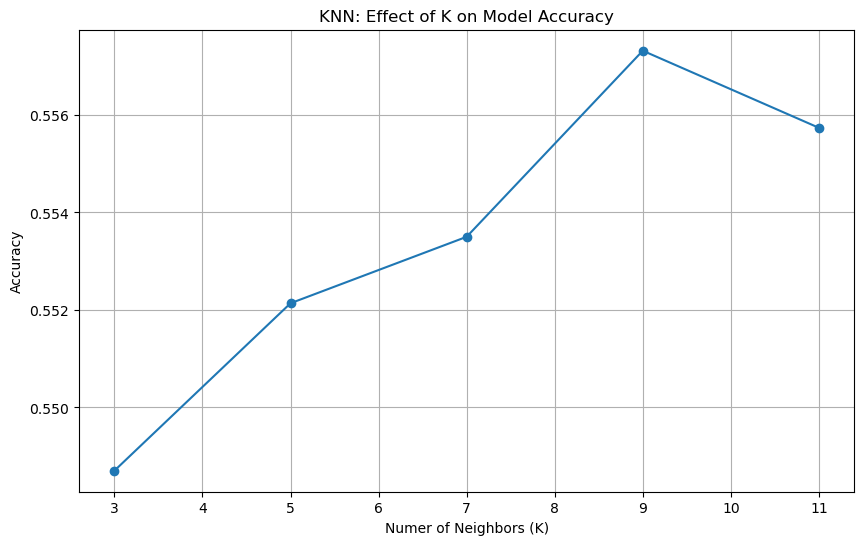

In [21]:
knn()

In [26]:
# Tune Model

def decision_tree():
    
    # Different possible max depths
    max_depths = [2, 3, 4, 5]
    accuracies = []

    # Loop through different max depths and run a DT model / report accuracies
    for depth in max_depths:
        dt = DecisionTreeClassifier(max_depth=depth) ##### Depth is how many nodes there are, how many times split basically 
        dt.fit(X_train_scaled, y_train)
        y_pred = dt.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        print(f" Max Depth: {depth} - Accuracy: {accuracy:.3f}")

In [27]:
decision_tree()

 Max Depth: 2 - Accuracy: 0.464
 Max Depth: 3 - Accuracy: 0.497
 Max Depth: 4 - Accuracy: 0.511
 Max Depth: 5 - Accuracy: 0.531


In [30]:
##### Visualize Model ######

# Visualize the best performing tree
dt_best = DecisionTreeClassifier(max_depth = 5)
dt_best.fit(X_train_scaled, y_train)

# Create the mapping from numeric classes to descriptive names
class_mapping = dict(zip(dt_best.classes_, np_df.ParkName.unique()))

# Convert class labels in dt.classes_ to strings using the mapping
class_names_str = [class_mapping[cls] for cls in dt_best.classes_]

# Plot decision tree

plt.figure(figsize = (12, 15), dpi = 700)
plot_tree(dt_best, feature_names = X.columns, class_names = class_names_str,
          filled = True, rounded = True)

plt.title('Decision Tree with Max Depth of 5')
plt.savefig('decision_tree.png')
plt.show()

In [31]:
# Look more closely at node values
dt_best.tree_.value[2]

array([[ 996.,  901., 1352., 1728., 1806., 1193., 1809., 1144., 1715.,
         994.,  359., 1217., 1802., 1207., 1234.]])

In [33]:
# Feature importance

dt_best.feature_importances_
X.columns

feature_importance = pd.DataFrame({
    "Best":
})

Index(['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')